## Read data 

In [2]:
import os
import sys
import time
import matplotlib
import pathlib
import graphviz
import itertools
import pycaret
import pyforest
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
#from sklearn import *
import seaborn as sns
from sklearn import tree 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
font2 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size' : 20,
                }
def plot_roc_curve(fprs,tprs):
    plt.figure(figsize=(8,6),dpi=80)
    plt.plot(fprs,tprs)
    plt.plot([0,1],linestyle='--')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    font2 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size' : 20,
                }
    plt.ylabel('TP rate',font2)
    plt.xlabel('FP rate',font2)
    plt.title('ROC',font2)
    plt.savefig('ROC.jpg', dpi=300) 
    plt.show()

def plot_cnf_matirx(cnf_matrix,description):
    class_names = [0,1]
    fig = plt.gcf( )
    fig.set_size_inches(15.5, 10.5)
    matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
    matplotlib.rcParams['axes.unicode_minus']=False  
    fig,ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks,class_names)
    plt.yticks(tick_marks,class_names)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd',fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(description, y = 1.1,fontsize=16)
    font2 = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size' : 20,
                }
    plt.ylabel('True0/1',font2)
    plt.xlabel('Pred0/1',font2)
    fig = plt.gcf( )
    fig.set_size_inches(5.5, 4.5)
    plt.savefig('cnf_matirx.jpg', dpi=300)
    plt.show()
    
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
data = pd.read_csv("./data.csv")
S1 = pd.read_csv("./S1.csv")
S2 = pd.read_csv("./S2.csv")
df =S1

In [4]:
data.describe()

,Tc
count,12340.000000
mean,23.503293
std,28.565083
min,0.000500
25%,3.400000
50%,10.000000
75%,33.000000
max,143.000000


In [5]:
df

,name,Tc,H,He,Li,Be,B,C,N,O,...,Mt,Ds,Rg,Cn,Nh,Fl,Mc,Lv,Ts,Og
0,Zr74.1Ti3.9Ni22,3.650,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Zr70.2Ti7.8Ni22,3.320,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,Zr66.3Ti11.7Ni22,3.560,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Zr62.4Ti15.6Ni22,3.215,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Zr55Cu30Al10Ni5,1.350,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12335,Ag0.05Rh0.04Ti0.91,1.950,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12336,Ag0.03Tl0.97,2.670,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12337,Ag0.035Cd0.01Sn0.955,3.650,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
12338,Ag0.005Zn0.995,0.763,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


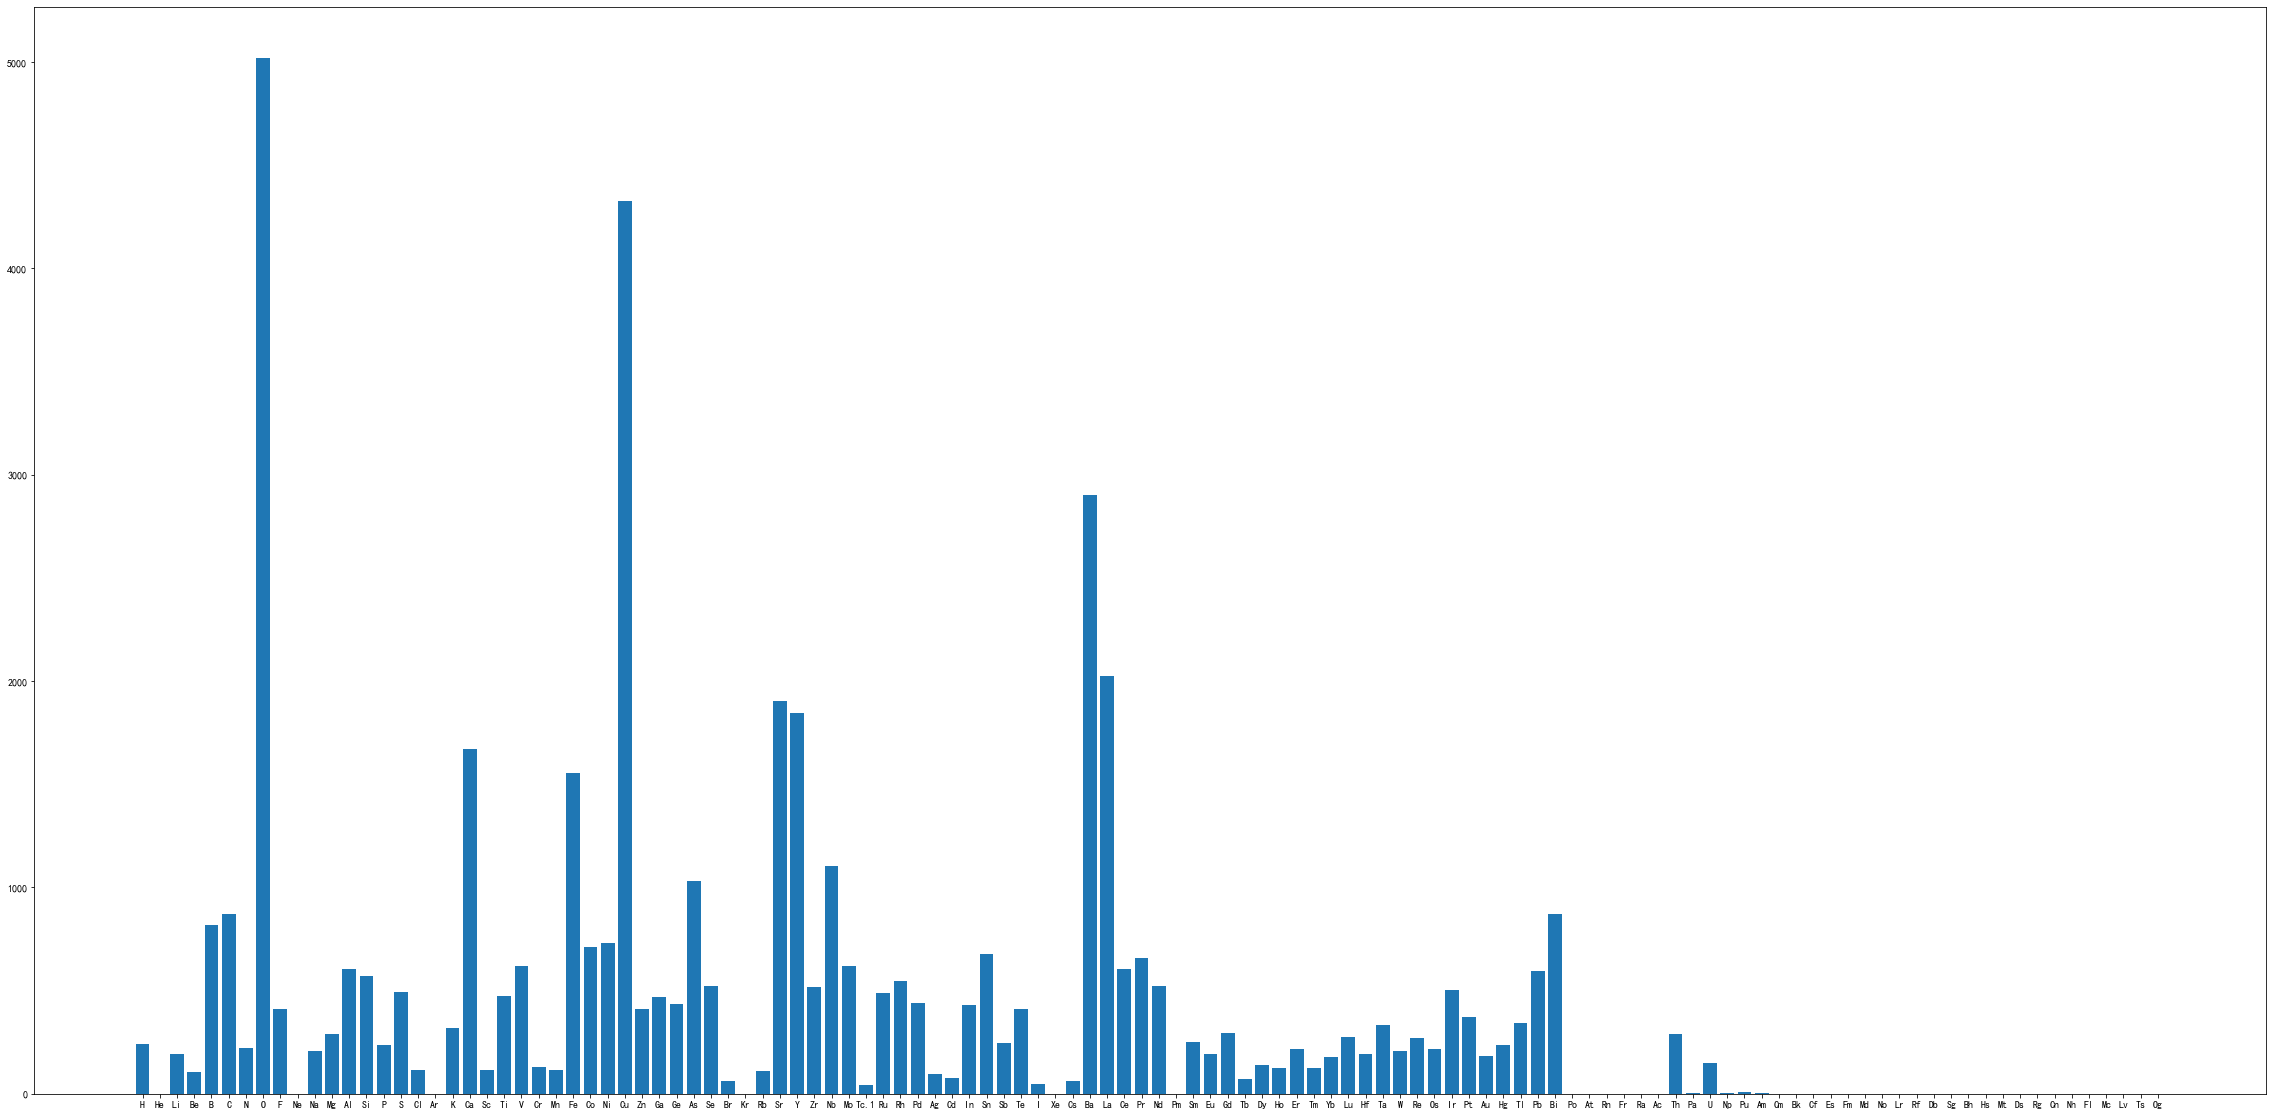

In [8]:
distribution = []
elem = []
for i  in  df.columns[2:]  :
    ca = (df[i]==0).sum()
    realele = 12340-ca
    distribution.append(realele)
    elem.append(i)
fengfu = pd.DataFrame(distribution)
elem = pd.DataFrame(elem)
elem["elem"]=elem
elem["distribution"]=distribution
x = elem["elem"]
y = elem["distribution"]
#seaborn.barplot(data=fengfu)
matplotlib.rcParams['font.sans-serif']=['SimHei']   
matplotlib.rcParams['axes.unicode_minus']=False     
plt.figure(figsize=(40,20))
plt.bar(x,y)
plt.savefig('distribution.jpg', dpi=300) 
plt.show()

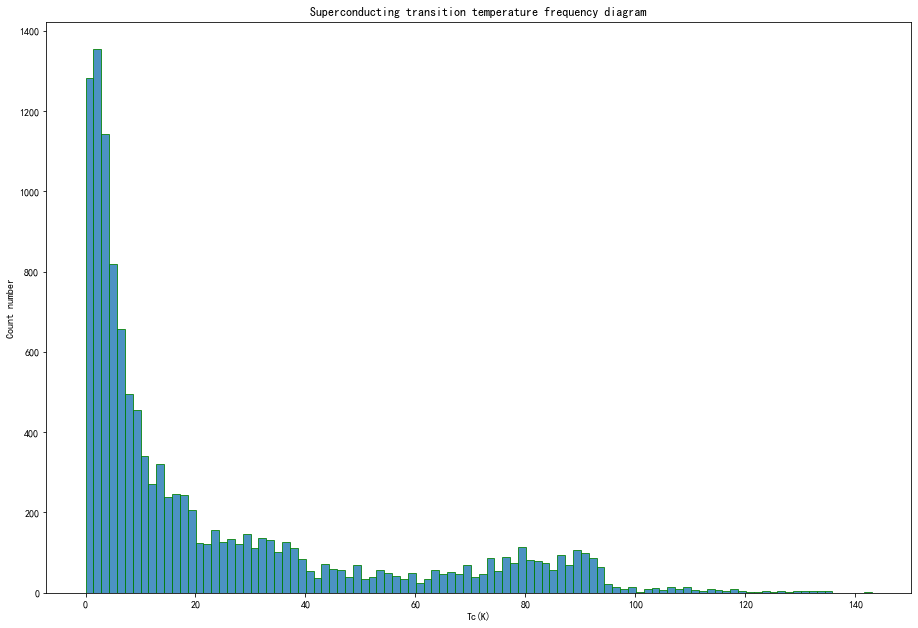

In [9]:
#Superconducting transition temperature frequency diagram of all materials
fig = plt.gcf( )
fig.set_size_inches(15.5, 10.5)
matplotlib.rcParams['font.sans-serif']=['SimHei']   
matplotlib.rcParams['axes.unicode_minus']=False     
plt.hist(data["Tc"], bins=100, color=None,edgecolor="green", alpha=0.8)
plt.title('Superconducting transition temperature frequency diagram')
plt.xlabel("Tc(K)")
plt.ylabel("Count number")
plt.show()

D:\py soft\conda\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if __name__ == '__main__':


Text(0.5, 1.0, 'Superconduct transition temperature count diagram')

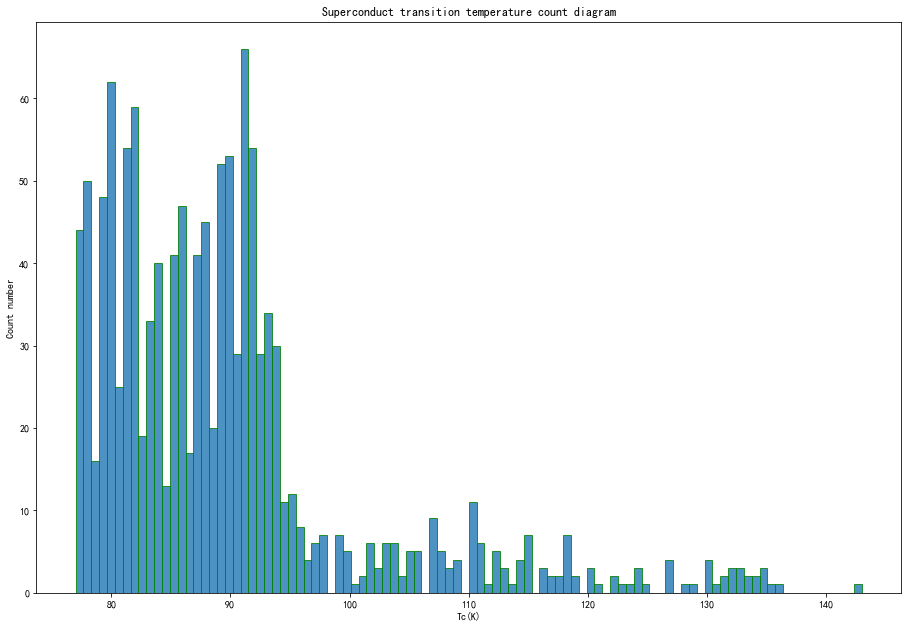

In [10]:
#Superconducting transition temperature frequency diagram of materiasl which Tc > 77K
fig = plt.gcf( )
fig.set_size_inches(15.5, 10.5)
dataTc = data[data["Tc"]>=77]
dataTc
matplotlib.rcParams['font.sans-serif']=['SimHei']  
matplotlib.rcParams['axes.unicode_minus']=False   
#plt.hist(dataTc, bins=100,log=False, color=None)
plt.hist(dataTc["Tc"], bins=100, normed=0,  edgecolor="green", alpha=0.8)
plt.xlabel("Tc(K)")
plt.ylabel("Count number")
plt.title('Superconduct transition temperature count diagram')